# Aadhar Card Calculations

In [1]:
# Importing required libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Head() - It is used to read first five rows from the table.

df = pd.read_csv('C:\\Dphi_Notes\\Examples\\aadhar.csv', low_memory=False)
df.head()            

,Registrar,Enrolment Agency,State,District,Sub District,Pin Code,Gender,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,F,7,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,M,8,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,F,13,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,M,6,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,M,8,1,0,0,1


In [6]:
df.shape           # To know the total number of Rows and Columns (rows, columns)

(440818, 12)

In [9]:
# To know the unique values of that given variable/feature.

print(df['State'].unique())
print(df['District'].unique())
print(df['Sub District'].unique())

['Uttar Pradesh' 'Assam' 'Bihar' 'Karnataka' 'Kerala' 'Odisha' 'Delhi'
 'Madhya Pradesh' 'Maharashtra' 'Telangana' 'Andhra Pradesh' 'Rajasthan'
 'West Bengal' 'Andaman and Nicobar Islands' 'Chhattisgarh' 'Jharkhand'
 'Tripura' 'Chandigarh' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu and Kashmir' 'Meghalaya' 'Punjab' 'Tamil Nadu' 'Uttarakhand'
 'Puducherry' 'Mizoram' 'Arunachal Pradesh' 'Goa' 'Manipur' 'Nagaland'
 'Others' 'Dadra and Nagar Haveli' 'Daman and Diu' 'Sikkim' 'Lakshadweep']
['Allahabad' 'Sonbhadra' 'Sultanpur' 'Shamli' 'Gorakhpur' 'Varanasi'
 'Bara Banki' 'Marigaon' 'Gopalganj' 'Bagalkot' 'Ballari'
 'Bangalore Rural' 'Belagavi' 'Bengaluru' 'Bidar' 'Chamrajanagar'
 'Chikkaballapur' 'Chikkamagaluru' 'Chitradurga' 'Dakshina Kannada'
 'Davangere' 'Dharwad' 'Gadag' 'Hassan' 'Haveri' 'Kalaburagi' 'Kodagu'
 'Kolar' 'Koppal' 'Mandya' 'Mysuru' 'Raichur' 'Ramanagar' 'Shivamogga'
 'Tumakuru' 'Udupi' 'Uttara Kannada' 'Vijayapura' 'Yadgir' 'Kasaragod'
 'Baleswar' 'Muzaffarpur' 'West 

In [10]:
# To check missing or null values in the table.

df.isnull().sum()

Registrar                            0
Enrolment Agency                     0
State                                0
District                             0
Sub District                         0
Pin Code                             0
Gender                               0
Age                                  0
Aadhaar generated                    0
Enrolment Rejected                   0
Residents providing email            0
Residents providing mobile number    0
dtype: int64

In [11]:
#  DESCRIBE - command to describe the structure of a table.

df.describe()

,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
count,440818.000000,440818.000000,440818.000000,440818.000000,440818.000000
mean,19.704368,1.601430,0.087510,0.044154,1.054496
std,18.686811,3.391819,0.407087,0.237212,1.547764
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,0.000000,0.000000
50%,13.000000,1.000000,0.000000,0.000000,1.000000
75%,30.000000,1.000000,0.000000,0.000000,1.000000
max,118.000000,391.000000,40.000000,15.000000,93.000000


In [12]:
df.columns     # To know the column names present in Dataset.

Index(['Registrar', 'Enrolment Agency', 'State', 'District', 'Sub District',
       'Pin Code', 'Gender', 'Age', 'Aadhaar generated', 'Enrolment Rejected',
       'Residents providing email', 'Residents providing mobile number'],
      dtype='object')

In [8]:
# To rename the column names of Dataset.

df = df.rename(columns={'Enrolment Agency':'Agency',\
                        'Sub District':'S_District',\
                       'Aadhaar generated':'Generated',\
                       'Enrolment Rejected':'Rejected',\
                       'Residents providing email':'Email',\
                       'Residents providing mobile number':'Mobile_num'}) 

In [ ]:
df.loc[df['Generated']>0,'Generated'] = 1
df.loc[df['Rejected']>0,'Rejected'] = 1
df.loc[df['Mobile']>0,'Mobile'] = 1
df['Gender'] = df['Gender'].map( {'F': 0, 'M': 1,'T': 2} ).astype(int)
df.loc[df['Age']==0 ,'Age'] = np.NAN
print('Number of states for which data exists: ',len(df['State'].unique()))
#df['State'] = map(lambda x :x.upper(),df['State'])

In [15]:
df.head()       # Records of First Five rows of Dataset.

,Registrar,Agency,State,District,S_District,Pin Code,Gender,Age,Generated,Rejected,Email,Mobile_num
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,Meja,212303,F,7,1,0,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,Robertsganj,231213,M,8,1,0,0,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,Sultanpur,227812,F,13,1,0,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,Shamli,247775,M,6,1,0,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,Sahjanwa,273001,M,8,1,0,0,1


In [42]:
# To chech the unique values of given column that exist in Dataset. 

print('Number of states for which data exists: ',len(df['State'].unique()))
print('Number of District for which data exists: ',len(df['District'].unique()))
print('Number of S_District for which data exists: ',len(df['S_District'].unique()))
print(df['Gender'].unique())

Number of states for which data exists:  37
Number of District for which data exists:  664
Number of S_District for which data exists:  5340
['F' 'M' 'T']


In [22]:
def prepare_plot_area(ax):
    # Remove plot frame lines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    
    # X and y ticks on bottom and left
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left()

In [46]:
# Defining a color pattern based.

colrcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40),\
             (148, 103, 189),  (140, 86, 75),\
             (227, 119, 194), (127, 127, 127),\
             (188, 189, 34), (23, 190, 207)]

In [47]:
for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.)

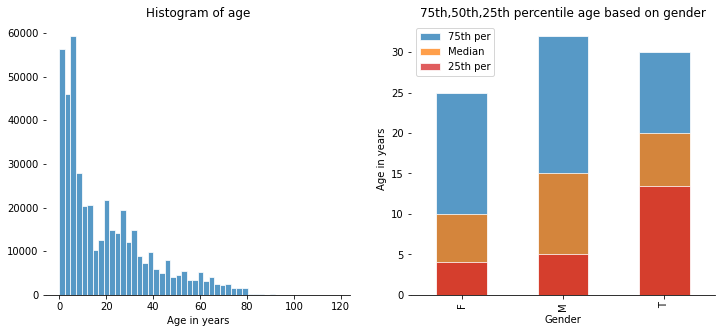

In [48]:
## Histogram of age of Aadhar applicants.

fix,axes = plt.subplots(figsize=(12,5), nrows=1, ncols=2)
plt.sca(axes[0])
p = plt.hist(df[df['Age'].notnull()]['Age'], 50, edgecolor = [1,1,1], alpha=0.75)
plt.title('Histogram of age')
plt.xlabel('Age in years')
prepare_plot_area(plt.gca())


# Ploting percentage of age based on gender

plt.sca(axes[1])
g = df.groupby('Gender')['Age'].quantile(.75)
g2 = df.groupby('Gender')['Age'].median()
g3 = df.groupby('Gender')['Age'].quantile(.25)
g.plot(kind = 'bar',color = colrcode[0],label = '75th per',edgecolor = [1,1,1], alpha=0.75)
g2.plot(kind = 'bar',color = colrcode[1],label = 'Median',edgecolor = [1,1,1], alpha=0.75)
g3.plot(kind = 'bar',color = colrcode[3],label = '25th per',edgecolor = [1,1,1], alpha=0.75)
plt.title('75th,50th,25th percentile age based on gender')
plt.ylabel('Age in years')
plt.xlabel('Gender')
plt.xticks([0,1,2],['F','M','T'])
l = plt.legend(loc='upper left')
prepare_plot_area(plt.gca())

The p value is  0.0


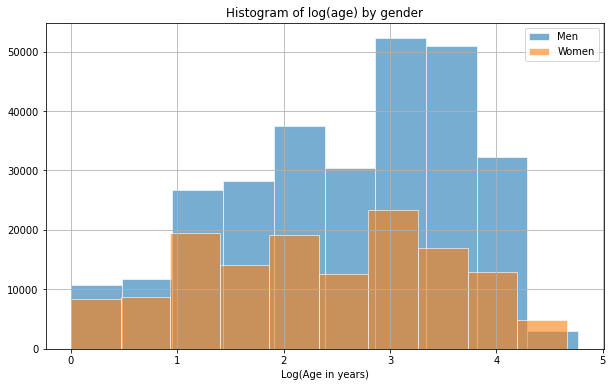

In [60]:
# Age comparision: men vs women.

fig = plt.figure(figsize=(10, 6))
np.log(df[(df['Gender']==1) & (df['Age'].notnull())]['Age']).hist(alpha = 0.6, label='Men', edgecolor=[1,1,1])
np.log(df[(df['Gender']==0) & (df['Age'].notnull())]['Age']).hist(alpha = 0.6, label='Women', edgecolor=[1,1,1])
plt.legend(loc='best')
plt.title('Histogram of log(age) by gender')
plt.xlabel('Log(Age in years)')
plt.show

## t-test
t,p_val = sp.stats.ttest_ind(np.log(df[(df['Gender']==0)&(df['Age'].notnull())]['Age']),np.log(df[(df['Gender']==1)&(df['Age'].notnull())]['Age']),equal_var = False)
print('The p value is ',p_val)


In [68]:
# Records showing the percentage of Man, Woman, trans.

perM = np.around(df[df['Gender']==1]['Gender'].count()/df['Gender'].count()*100,2)
perF = np.around(df[df['Gender']==0]['Gender'].count()/df['Gender'].count()*100,2)
perT = np.around(df[df['Gender']==2]['Gender'].count()/df['Gender'].count()*100,2)
print("Percentage man: ",perM)
print("Percentage woman: ", perF)
print("Percentage trans: ", perT)

Percentage man:  66.42
Percentage woman:  33.58
Percentage trans:  0.0


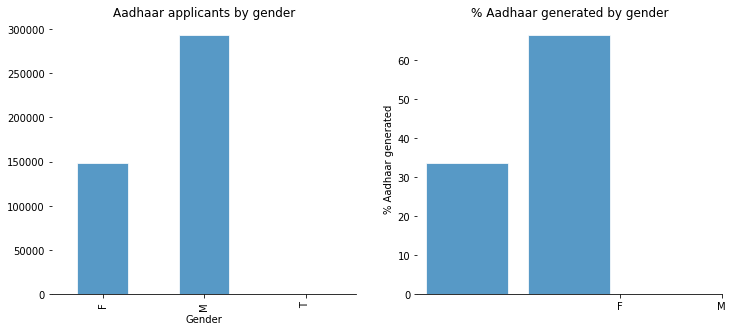

In [70]:
fig,axes = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)
plt.sca(axes[0])
g = df.groupby('Gender')['Generated'].count()
g.plot(kind = 'bar',color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.title('Aadhaar applicants by gender')
plt.xticks([0,1,2],['F','M','T'])
prepare_plot_area(plt.gca())
plt.sca(axes[1])
plt.bar(['F','M'],[perF,perM],color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.xticks([1.5,2.5],['F','M'])
plt.title('% Aadhaar generated by gender')
plt.ylabel('% Aadhaar generated')
prepare_plot_area(plt.gca())

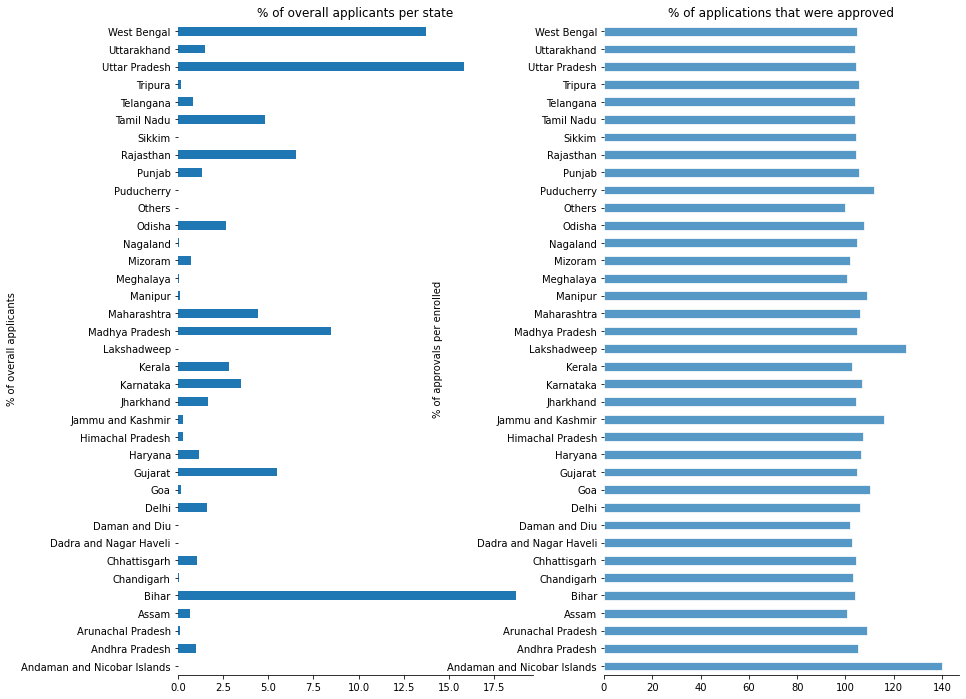

In [72]:
d = df.groupby('State')['Generated'].sum()
c = df.groupby('State')['Generated'].count()
perc_gen_per_state = c/d*100
perc_total =  d/d.sum()*100
fig,axes = plt.subplots(figsize = (14,12),nrows = 1,ncols =2)
plt.sca(axes[0])
perc_total.plot(kind = 'barh')
plt.ylabel('% of overall applicants')
plt.title('% of overall applicants per state')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
perc_gen_per_state.plot(kind = 'barh',color = colrcode[0],edgecolor = [1,1,1],alpha=  0.75)
plt.ylabel('% of approvals per enrolled')
plt.title('% of applications that were approved')
prepare_plot_area(plt.gca())

In [73]:


statesPop = {'Maharashtra':112372972,'West Bengal':91347736,\
              'Tamil Nadu':72138958,'Andhra Pradesh':49386799,\
              'Karnataka':61130704,'Kerala':33387677,'Madhya Pradesh':72597565,\
              'Gujarat':60383628,'Chhattisgarh':135191,'Odisha':41947358,\
              'Rajasthan':68621012,'Uttar Pradesh':207281477,'Assam':31169272,\
              'Haryana':25540196,'Delhi':18980000,'Jharkhand':32966238,\
              'Punjab':27704236,'Bihar':103804637,'Tripura':3671032,'Puducherry':1244464,\
              'Himachal Pradesh':6864602,'Uttarakhand':10116752,'Goa':1457723,\
              'Jammu and Kashmir':12548926,'Sikkim':607688,'Andaman and Nicobar Islands':379944,\
              'Arunachal Pradesh':1382611,'Meghalaya':2964007,\
              'Chandigarh':1055450,'Mizoram':1091014,'Dadra and Nagar Haveli':342853,\
              'Manipur':2721756,'Nagaland':1980602,'Daman and Diu':242911,\
              'Lakshadweep':64429,'Telangana' :35286757}



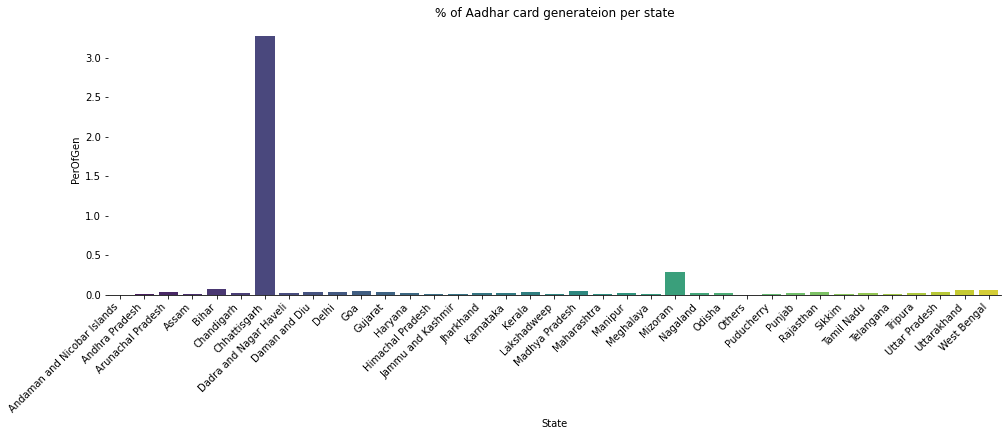

In [77]:
fig = plt.figure(figsize=(16, 5))
g = df.groupby(['State'],as_index=False)['Generated'].sum()

for state in statesPop.keys():
    g.loc[g['State']==state,'Population'] = statesPop[state]
   
g['PerOfGen'] = g['Generated']*100/g['Population']    
sns.barplot(x='State',y='PerOfGen',data=g,palette='viridis')
plt.title('% of Aadhar card generateion per state')
plt.xticks(rotation=45,ha='right')
prepare_plot_area(plt.gca())

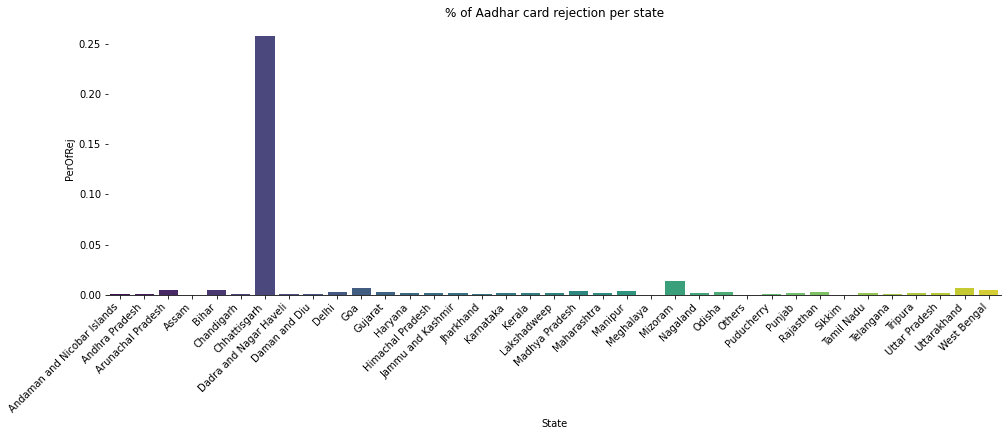

In [79]:
fig = plt.figure(figsize=(16, 5))
g = df.groupby(['State'],as_index=False)['Rejected'].sum()
for state in statesPop.keys():
    g.loc[g['State']==state,'Population'] = statesPop[state]
   
g['PerOfRej'] = g['Rejected']*100/g['Population']    
sns.barplot(x='State',y='PerOfRej',data=g,palette='viridis')
plt.title('% of Aadhar card rejection per state')
plt.xticks(rotation=45,ha='right')
prepare_plot_area(plt.gca())

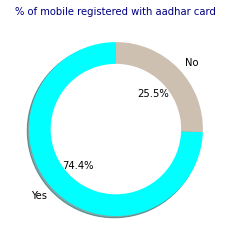

In [80]:
xyz=df['Mobile'].sum() 
cnt=df['State'].count()  
labels=['Yes','No']
data=[xyz,cnt-xyz]
fig = plt.figure(figsize=(6, 4))
plt.pie(data,labels =labels,shadow = True,startangle = 90, autopct='%1.1f%%',colors = ['#00FFFF','#CDC0B0'])
plt.title("% of mobile registered with aadhar card",fontsize=10,color='navy')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

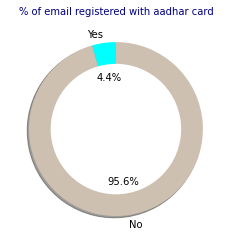

In [81]:
xyz=df['Email'].sum() 
cnt=df['State'].count()  
labels=['Yes','No']
data=[xyz,cnt-xyz]
fig = plt.figure(figsize=(5, 4))
plt.pie(data,labels =labels,shadow = True,startangle = 90, autopct='%1.1f%%',colors = ['#00FFFF','#CDC0B0'])
plt.title("% of email registered with aadhar card",fontsize=10,color='navy')
centre_circle = plt.Circle((0,0),0.75, fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [16]:
# Removed unwanted columns from Dataset.

final_dataset = df[['Registrar', 'Agency', 'State', 'District', 'Pin Code', 'Gender', 'Age', 'Mobile_num', 'Rejected', 'Generated']]

In [17]:
final_dataset.head(100)

,Registrar,Agency,State,District,Pin Code,Gender,Age,Mobile_num,Rejected,Generated
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,212303,F,7,1,0,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,231213,M,8,0,0,1
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,227812,F,13,1,0,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,247775,M,6,1,0,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,273001,M,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...
95,Atalji Janasnehi Directorate Government of Ka...,Atalji Janasnehi Directorate GOK,Karnataka,Belagavi,591220,F,75,1,0,1
96,Atalji Janasnehi Directorate Government of Ka...,Atalji Janasnehi Directorate GOK,Karnataka,Belagavi,591232,F,18,1,0,1
97,Atalji Janasnehi Directorate Government of Ka...,Atalji Janasnehi Directorate GOK,Karnataka,Belagavi,591240,F,1,1,0,1
98,Atalji Janasnehi Directorate Government of Ka...,Atalji Janasnehi Directorate GOK,Karnataka,Belagavi,591265,F,1,1,1,0


In [18]:
final_dataset.tail(100)

,Registrar,Agency,State,District,Pin Code,Gender,Age,Mobile_num,Rejected,Generated
440718,Union Bank,Vakrangee Softwares Limited,Uttarakhand,Dehradun,248171,F,0,1,0,1
440719,Union Bank,Vakrangee Softwares Limited,Uttarakhand,Dehradun,248197,F,7,1,1,0
440720,Union Bank,Vakrangee Softwares Limited,Uttarakhand,Dehradun,248197,M,2,1,0,1
440721,Union Bank,Vakrangee Softwares Limited,Uttarakhand,Dehradun,248197,M,3,1,0,1
440722,Union Bank,Vakrangee Softwares Limited,Uttarakhand,Dehradun,248197,M,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...
440813,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,822123,M,1,1,0,3
440814,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,822123,M,2,1,0,1
440815,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,822123,M,3,1,0,3
440816,Women and Child Development Govt. of Jharkhand,Women and Child Development,Jharkhand,Palamu,822123,M,4,0,0,1


In [19]:
# Corr() - How one Feature is Correlated to other Feature.

final_dataset.corr()

,Age,Mobile_num,Rejected,Generated
Age,1.000000,-0.117545,-0.099323,-0.126141
Mobile_num,-0.117545,1.000000,0.179212,0.693611
Rejected,-0.099323,0.179212,1.000000,0.140117
Generated,-0.126141,0.693611,0.140117,1.000000


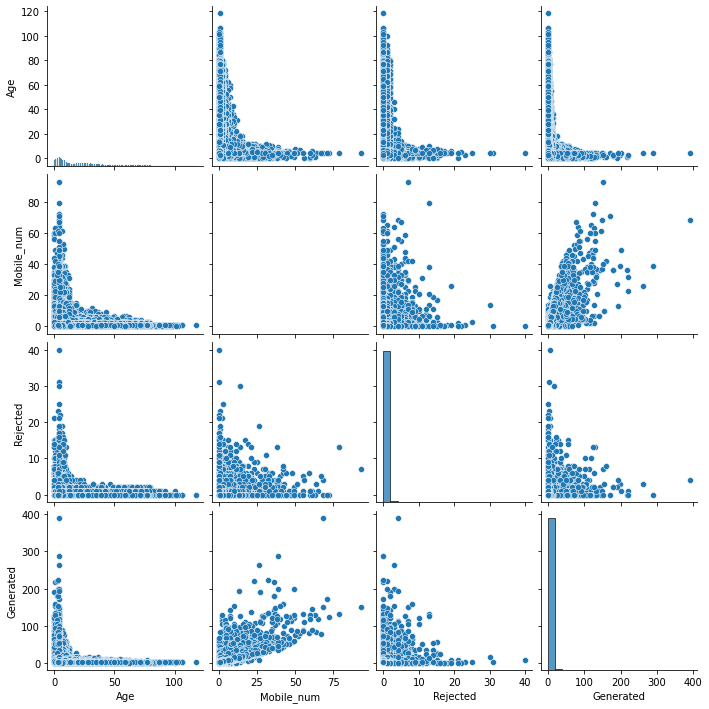

In [20]:
# we can see pair of each variables by using pairplot.

sns.pairplot(final_dataset)

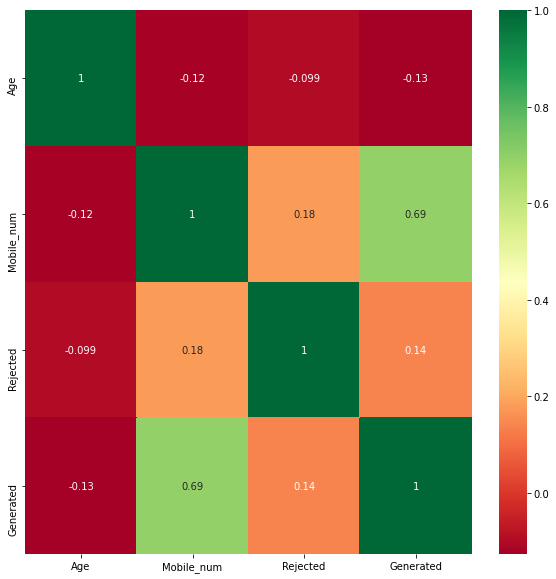

In [21]:
# to see the Correlation graph of pair of top features.

corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))         # size of graph

# plot heat map (From the graph Dark Green is positively correlated & Dark Red is Negatively correlated).

g=sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [22]:
# Y=Selling_Price is the dependent variable and remaining columns are independent variables i.e X.

X = final_dataset.iloc[:,0:-2]
Y = final_dataset.iloc[:,-1]

In [23]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Generated, dtype: int64

In [26]:
X.head()

,Registrar,Agency,State,District,Pin Code,Gender,Age,Mobile_num
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Uttar Pradesh,Allahabad,212303,F,7,1
1,Allahabad Bank,Asha Security Guard Services,Uttar Pradesh,Sonbhadra,231213,M,8,0
2,Allahabad Bank,SGS INDIA PVT LTD,Uttar Pradesh,Sultanpur,227812,F,13,1
3,Allahabad Bank,Sri Ramraja Sarkar Lok Kalyan Trust,Uttar Pradesh,Shamli,247775,M,6,1
4,Allahabad Bank,Transmoovers India,Uttar Pradesh,Gorakhpur,273001,M,8,1


In [27]:
# Now train, test, split the data.

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)    # here 0.2=test data

In [29]:
X_train.shape

(352654, 8)